In [15]:
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import pydot
import tensorflow as tf

from time import time
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [16]:
def getProjectDir():
    projectDir = ""
    f = os.getcwd().split('/')
    for d in f:
        if d == 'image-captioning':
            projectDir += d
            break;
        projectDir += d + "/"
    return projectDir

In [17]:
projectDir = getProjectDir()
projectDir

'/home/manojmenpadi/Documents/projects/image-captioning'

In [18]:
#lets load our model
# model = load_model(projectDir + "/model/model_20.h5")
# model = load_model(projectDir + "/model/model_20_flickr30k.h5")
model = load_model(projectDir + "/model/model_30_flickr30k.h5")

In [19]:
# Retrieving word indexes
word2idx = None
with open(projectDir + "/Data/word_indexes/" + "word_to_idx.txt", 'r') as f:
    word2idx = f.read()

json_string = word2idx.replace("'","\"")
word2idx = json.loads(json_string)

idx2word = {}
for key in word2idx.keys():
    idx2word[word2idx[key]] = key
    
max_len = 38

In [20]:
# Retrieving encoded test data
with open(projectDir + "/Data/encoded_data/" + "encoded_test_features.pkl", 'rb') as f:
    encoding_test = pickle.load(f)

## Predictions

In [21]:
def predict_caption(image):
    inp_txt = "startseq"
    for i in range(max_len):
        sequence = [word2idx[word] for word in inp_txt.split() if word in word2idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        
        ypred = model.predict([image, sequence])
        ypred = ypred.argmax() # Word with max probability will be chosen i.e. Greedy sampling
        word = idx2word[ypred]
        inp_txt = inp_txt + (' ' + word)
        
        if word == 'endseq':
            break
            
    out_caption = inp_txt.split()[1:-1]
    out_caption = ' '.join(out_caption)
    
    return out_caption

In [22]:
f30k_img_dir = "/Data/flickr30k/flickr30k_imgs/"

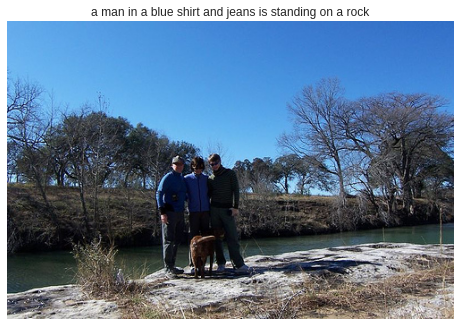

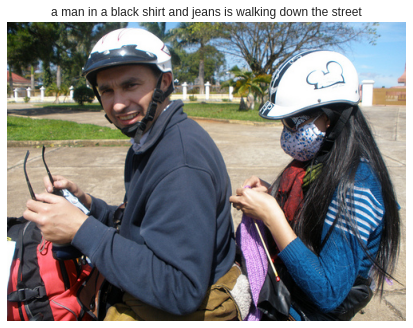

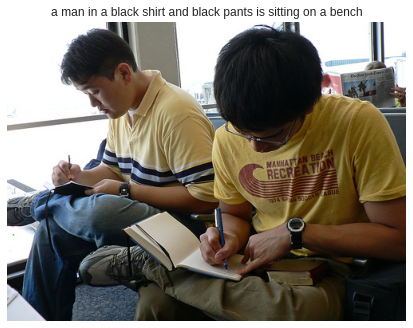

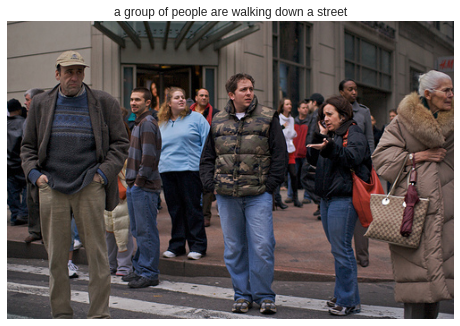

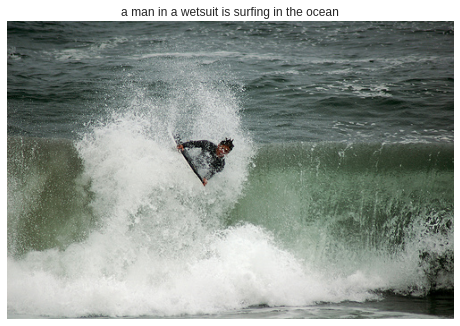

In [27]:
plt.style.use("seaborn")
for i in range(5):
    idx = np.random.randint(0,1000)
    img_id = list(encoding_test.keys())[idx]
    img_2048 = encoding_test[img_id].reshape((1,2048))
    
    i = plt.imread(projectDir + f30k_img_dir + img_id + ".jpg")
    
    caption = predict_caption(img_2048)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()